In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import math
import networkx as nx

### Import data

Basemap: map we'll be tracing over <br/>Data: list of well data for each county

In [2]:
orphans = pd.read_csv(r'E_WEB LIST OF ORPHANS _12 DELIN 03.31.2020.csv')

county_numbers_std = [i for i in range(1, 298, 2)] + [i for i in range(349, 508, 2)]
county_numbers_census = [i for i in range(299, 348, 2)]
county_names = {x for x in orphans['COUNTY_NAME']}

basemap = pd.concat([
    gpd.read_file(shp)
    for shp in [r'Maps\Basemap{:03}\road{:03}l.shp'.format(N, N) for N in county_numbers_std] + \
               [r'Maps\Basemap{:03}N\tl_2020_48{:03}_roads.shp'.format(N, N) for N in county_numbers_census]
])

data = [
    gpd.read_file(shp)
    for shp in [r'Wells\well{:03}\well{:03}b.shp'.format(N, N) for N in county_numbers_std + county_numbers_census]
]

### Combining the datasets

Spatial: list of orphans with their spatial components (each element is a separate county)

In [3]:
spatial = []
for i, D in enumerate(data):
    num=0 # Represents the county number (index of cluster_centers)
    if i<149:
        num = i
    elif i<229:
        num = i+25
    else:
        num = i-80
        
    ata_orp = orphans.loc[orphans['API']//10**5==(2*num+1)]
    
    wellid = []
    for i in ata_orp.index.values:
        wellid.append(str(ata_orp.API[i])[-5:])
    
    ata_orp['WELLID'] = wellid
    
    spatial.append( D.merge(ata_orp, how='right', on='WELLID') )
    
    spatial[-1] = spatial[-1][spatial[-1]['LONG83']<-90] # Factor out any invalid points (NaN lat/long)

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Here we can graph the state of Texas with each orphaned well

In [ ]:
ax = basemap.plot(figsize=(15,15), zorder=0, color='y')

for S in spatial:
    if len(S)>0:
        S.plot(column='FIELD_NAME', ax=ax)

plt.xlabel('longitude')
plt.ylabel('latitude')

#### Distance Calculator

This function will calculate the euclidean distance in terms of miles

In [4]:
R_EARTH = 3958.8  #miles

# Use formula: angle (radians) * R_EARTH
def angleToDist(x, y): # Input: tuples x and y (lat. and long.)
    a = math.sqrt( (y[0]-x[0])**2 + (y[1]-x[1])**2 )
    return R_EARTH * (math.pi/180) * a

### Cluster wells for each county

Clusters: list of dataframes, each containing the wells in a cluster <br/>Cluster_centers: a list of the center of each respective cluster

In [5]:
CLUSTER_RADIUS = 1 #mile
clusters = [[] for _ in range(len(spatial))]
# List of a list of dataframes - each one containing a cluster of wells within ~ a [CLUSTER_RADIUS] mile radius

for i, S in enumerate(spatial):
    for j in S.index:
        well = S[S.index==j]
        coordinates = (well['LONG83'].mean(), well['LAT83'].mean())
        findsCluster = False
    
        for k, C in enumerate(clusters[i]):
            if angleToDist(coordinates, ( C['LONG83'].mean(), C['LAT83'].mean() ) ) < CLUSTER_RADIUS:
                temp = clusters[i][k].append(well) # if the well is close enough to a cluster, append it to the cluster dataframe
                clusters[i][k] = temp
                findsCluster = True
                break
        
        if not findsCluster: # otherwise create a new dataframe in the list
            clusters[i].append(well)
        
cluster_centers = [[( C['LONG83'].mean(), C['LAT83'].mean() ) for C in clus] for clus in clusters] # list of the centers of corresponding clusters

Now lets plot these clusters (the larger the dot, the bigger the cluster)

Text(111.25, 0.5, 'latitude')

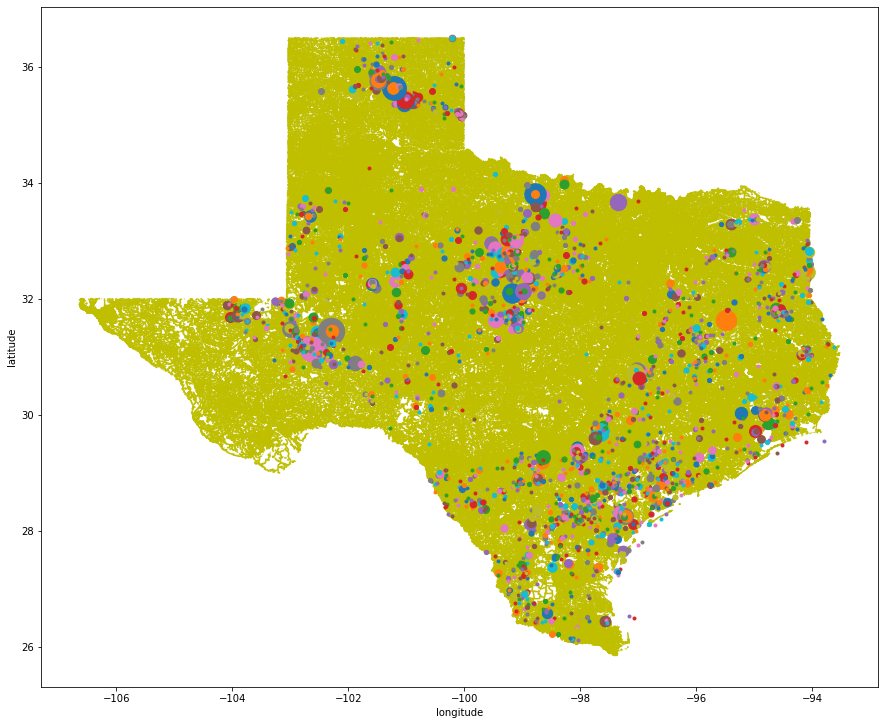

In [7]:
ax = basemap.plot(figsize=(15,15), zorder=0, color='y')
for i, C in enumerate(cluster_centers):
    for j, p in enumerate(C):
        plt.scatter(p[0], p[1])

plt.xlabel('longitude')
plt.ylabel('latitude')

### Create DiGraph of map

In order to save time looking through all data-points, we'll create a graph for each county, then mesh them together at the end.

In [6]:
county_graphs = [nx.read_shp(shp) \
                 for shp in [r'Maps\Basemap{:03}\road{:03}l.shp'.format(N, N) for N in county_numbers_std] + \
                            [r'Maps\Basemap{:03}N\tl_2020_48{:03}_roads.shp'.format(N, N) for N in county_numbers_census]
                ]

for G in county_graphs:
    for e in G.edges.data():
        G[e[0]][e[1]]['Distance'] = angleToDist(e[0], e[1])
    
        if (e[1], e[0]) not in G.edges: # checks for duplicates
            G.add_edge(e[1], e[0]) # adds inverse edge
        
            for A in e[2]:
                G[e[1]][e[0]][A] = e[2][A]

In [7]:
[nx.number_strongly_connected_components(G) for G in county_graphs]

[254,
 66,
 234,
 50,
 133,
 55,
 187,
 60,
 47,
 175,
 228,
 78,
 177,
 148,
 342,
 113,
 56,
 141,
 197,
 239,
 173,
 138,
 59,
 89,
 121,
 142,
 189,
 214,
 145,
 115,
 204,
 39,
 74,
 263,
 54,
 103,
 354,
 106,
 109,
 37,
 129,
 152,
 743,
 90,
 154,
 126,
 162,
 95,
 147,
 118,
 56,
 99,
 121,
 47,
 70,
 62,
 516,
 82,
 85,
 46,
 306,
 283,
 78,
 97,
 127,
 171,
 141,
 81,
 138,
 317,
 268,
 609,
 138,
 143,
 361,
 117,
 52,
 43,
 264,
 47,
 183,
 67,
 140,
 234,
 62,
 260,
 69,
 106,
 395,
 122,
 384,
 192,
 168,
 162,
 24,
 89,
 130,
 76,
 72,
 221,
 582,
 340,
 48,
 103,
 167,
 123,
 220,
 400,
 155,
 43,
 182,
 112,
 145,
 82,
 68,
 690,
 84,
 73,
 206,
 138,
 279,
 84,
 220,
 66,
 197,
 367,
 99,
 201,
 537,
 78,
 22,
 82,
 314,
 113,
 45,
 26,
 38,
 71,
 101,
 76,
 120,
 62,
 309,
 190,
 244,
 274,
 185,
 123,
 183,
 2268,
 170,
 78,
 124,
 63,
 35,
 117,
 486,
 236,
 439,
 98,
 196,
 292,
 82,
 39,
 73,
 40,
 66,
 115,
 100,
 75,
 89,
 42,
 145,
 149,
 146,
 323,
 171,
 13

In order to save time and space, we can remove unnecessary components with 2-3 nodes.

In [8]:
MIN_COMPONENT_SIZE = 5

# Here we'll clear out small, unnecessary components to save time later
for G in county_graphs:
    for C in list(nx.strongly_connected_components(G))[:]:
        if len(C)<MIN_COMPONENT_SIZE:
            for n in C:
                G.remove_node(n)

In [9]:
[nx.number_strongly_connected_components(G) for G in county_graphs]

[26,
 12,
 43,
 11,
 23,
 9,
 26,
 11,
 3,
 39,
 37,
 12,
 24,
 15,
 48,
 28,
 7,
 19,
 32,
 44,
 27,
 30,
 11,
 13,
 13,
 8,
 37,
 22,
 37,
 11,
 36,
 7,
 2,
 38,
 3,
 21,
 34,
 11,
 10,
 3,
 27,
 14,
 106,
 11,
 24,
 41,
 13,
 11,
 10,
 17,
 7,
 17,
 19,
 2,
 23,
 7,
 53,
 3,
 12,
 3,
 52,
 24,
 6,
 19,
 13,
 32,
 18,
 17,
 48,
 41,
 37,
 67,
 19,
 14,
 33,
 15,
 4,
 4,
 39,
 5,
 27,
 10,
 19,
 66,
 10,
 48,
 12,
 19,
 43,
 22,
 35,
 31,
 26,
 35,
 3,
 12,
 15,
 11,
 4,
 38,
 115,
 42,
 2,
 10,
 27,
 20,
 48,
 38,
 10,
 2,
 33,
 14,
 23,
 9,
 12,
 76,
 16,
 15,
 21,
 13,
 38,
 28,
 32,
 20,
 20,
 48,
 6,
 21,
 69,
 10,
 7,
 11,
 75,
 18,
 8,
 8,
 9,
 6,
 10,
 5,
 19,
 6,
 20,
 31,
 34,
 55,
 25,
 22,
 19,
 540,
 21,
 10,
 13,
 7,
 5,
 18,
 86,
 16,
 58,
 5,
 40,
 39,
 10,
 12,
 12,
 6,
 10,
 30,
 8,
 12,
 23,
 7,
 19,
 29,
 15,
 25,
 28,
 18,
 30,
 16,
 8,
 11,
 30,
 15,
 20,
 5,
 54,
 32,
 38,
 29,
 8,
 19,
 18,
 3,
 39,
 11,
 16,
 2,
 11,
 9,
 35,
 58,
 11,
 23,
 28,
 21,
 42,
 38,

Finally, let's add some edges to connect the remaining disjoint components (within each county)

In [10]:
conn_X, conn_Y = [], []
TOL = 0.0005  # The maximum squared distance a new connection can make (Stage 2)

for G in county_graphs:
    components = sorted(nx.strongly_connected_components(G), key=len)
        
    sq_dist = lambda n1, n2: (n1[0]-n2[0])**2 + (n1[1]-n2[1])**2
        
    # This is the find_closest function from 
    find_closest = lambda comp, N: min([(sq_dist(N, n), n) for n in comp])
    
    newEdges = []
    
    # Stage 1: Go down the line of components (smallest to largest), connecting them to the closest node of another component
    for i, C in enumerate(components[:-1]):
        center = (sum([n[0] for n in C])/len(C), sum([n[1] for n in C])/len(C))
        
        # Finds the node of another component that's closest to the current component's center
        closest_other_node = min([find_closest(components[j], center) for j in range(i+1, len(components))])
        
        # Then, find the point in the current component that's closest to that point
        closest_main_node = find_closest(C, closest_other_node[1])
        
        newEdges.append((closest_main_node[1], closest_other_node[1], closest_main_node[0]))
        
    for e in newEdges:
        if e[2]<TOL: # If the added edge is within the tolerence, implement it to the graph
            G.add_edge(e[0], e[1], Distance = angleToDist(e[0], e[1])  )
            G.add_edge(e[1], e[0], Distance = angleToDist(e[1], e[0])  )
        
            conn_X.append([e[0][0], e[1][0]]) # used for displaying added roads
            conn_Y.append([e[0][1], e[1][1]])
    
    # Stage 2: Find the shortest remaining connections between all remaining components
    while nx.number_strongly_connected_components(G)>1:
        components = sorted(nx.strongly_connected_components(G), key=len)
        centers = [(sum([n[0] for n in C])/len(C), sum([n[1] for n in C])/len(C)) for C in components]
    
        length = len(components)
        # Here we form a table holding the shortest distance between two components
        temp =  [[find_closest(components[i], centers[j])[1] for i in range(length)] for j in range(length)]
        table = [[list(find_closest(components[j], temp[j][i]))+[temp[j][i]] for i in range(length)] for j in range(length)]
        
        # Set all diagonals from 0 distance to inf
        for k in range(length):
            table[k][k] = [1e99]
        
        # Implement the shortest edge - rinse and repeat until all components are connected
        _, n1, n2 = min([min(x) for x in table])
        e = (n1, n2)
        G.add_edge(e[0], e[1], Distance = angleToDist(e[0], e[1])  )
        G.add_edge(e[1], e[0], Distance = angleToDist(e[1], e[0])  )
        
        conn_X.append([e[0][0], e[1][0]]) # used for displaying added roads
        conn_Y.append([e[0][1], e[1][1]])

In [11]:
[nx.number_strongly_connected_components(G) for G in county_graphs]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


Now let's see what connections were made:

Text(111.25, 0.5, 'latitude')

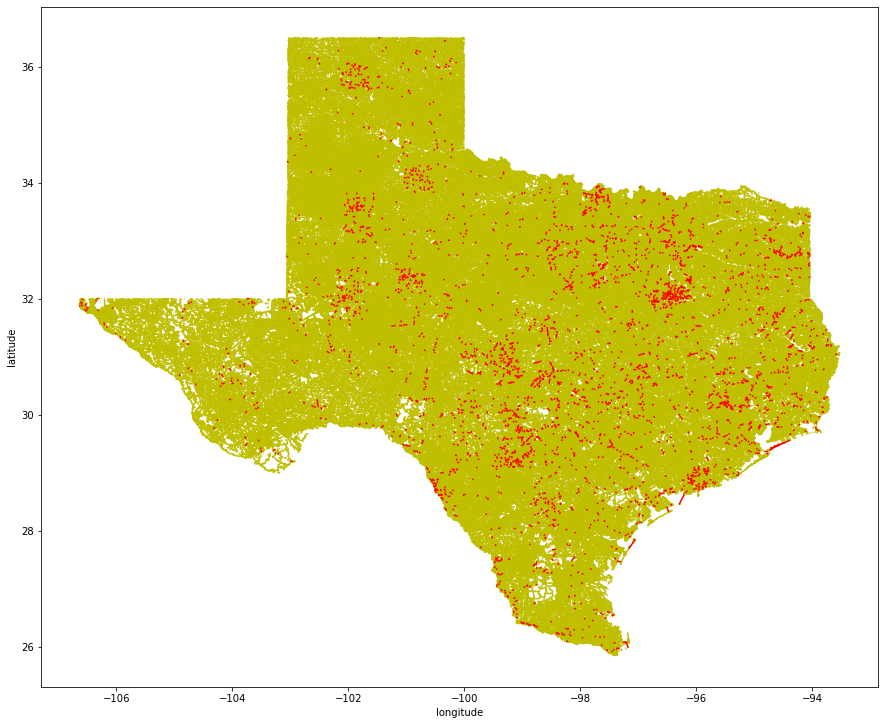

In [14]:
ax = basemap.plot(figsize=(15,15), zorder=0, color='y')

for i in range(len(conn_X)):
    plt.plot(conn_X[i], conn_Y[i], color='r')

plt.xlabel('longitude')
plt.ylabel('latitude')

### Adding clusters of wells to each county

Given the unique ordering of the data (above), we need to account for the county regarding the index value.

In [12]:
for i, G in enumerate(county_graphs):
    num=0 # Represents the county number
    if i<149:
        num = i
    elif i<229:
        num = i+25
    else:
        num = i-80
        
    for j, C in enumerate(cluster_centers[i]):
        coords = (C[0], C[1])
    
        closest = (0,0)
        for node in G.nodes:
            if angleToDist(coords, node) < angleToDist(coords, closest):
                closest = node
            
        G.add_node(coords, well=True, Size=len(clusters[i][j]))
            
        d = angleToDist(coords, closest)
        G.add_edge(coords, closest, Distance = d)
        G.add_edge(closest, coords, Distance = d)

The following cell finds the clusters added to the Atascosa environment. If you recall from the Create Atascosa notebook, there should be 22 clusters.

In [13]:
temp_clusters = []
for x in county_graphs[6].nodes.data():
    if x[1]!={}:
        temp_clusters.append(tuple([x[0], x[1]['Size']])) # the size variable can be removed if unwanted
        
temp_clusters

[((-98.72930564, 29.05115702), 1),
 ((-98.791694495, 29.00298879), 2),
 ((-98.28129662, 28.89002402), 1),
 ((-98.72010547, 29.18036479), 1),
 ((-98.346983635, 28.90336087), 2),
 ((-98.735289493, 28.884813801), 20),
 ((-98.75172126999999, 28.87813230142857), 7),
 ((-98.72745071, 28.86660764), 1),
 ((-98.74054584333332, 28.83449039333333), 3),
 ((-98.73506198285712, 28.90698824714286), 7),
 ((-98.76985064, 28.9485843), 1),
 ((-98.52448421, 28.87908197), 1),
 ((-98.16279453499999, 28.750711709999997), 2),
 ((-98.73690283, 28.81946942), 1),
 ((-98.63923124499999, 28.85497386), 2),
 ((-98.65527190210526, 29.18506977894737), 19),
 ((-98.68425455333333, 29.17836441), 3),
 ((-98.70341999, 29.17525964), 1),
 ((-98.76065773, 29.19713571), 1),
 ((-98.19564892, 28.7736562), 1),
 ((-98.34134356999999, 28.920911033333336), 6),
 ((-98.80039774, 29.184725325000002), 2)]

In [14]:
# This cell acts as a test to determine if a path exists between each well
reachable = []

for i in range(len(clusters[6])):
    for j in range(i+1, len(clusters[6])):
        p1 = cluster_centers[6][i]
        p2 = cluster_centers[6][j]
        reachable.append((i, j, nx.has_path(county_graphs[6], p1, p2)))
        
len(reachable), sum(int(x[2]) for x in reachable) # We want both values to be equal

(231, 231)

### Storing each county, as well as a connection between all the counties

In [15]:
for i, G in enumerate(county_graphs):
    nx.write_shp(G, r'Texas\Env'+str(i)) # Note: env. number is not the equivalent number of the county

In [17]:
Counties = nx.Graph()

county_centers = [( sum([n[0] for n in G.nodes])/len(G.nodes), sum([n[1] for n in G.nodes])/len(G.nodes) ) \
                  for G in county_graphs]

Counties.add_node(county_centers[0], envNum = 0)

for i, N in enumerate(county_centers[1:]):
    for n in county_centers[:i+1]:
        Counties.add_edge(n, N, Distance=angleToDist(n, N))
        
    Counties.nodes[N]['envNum'] = i+1
    
nx.write_shp(Counties, r'Texas\Counties')